In [1]:
!ls

anaconda3				Music
deep-learning-v2-pytorch		Pictures
Desktop					print.py
Documents				Public
Downloads				pytorch_challenge
examples.desktop			Templates
google-chrome-stable_current_amd64.deb	Untitled1.ipynb
hi.py					Untitled.ipynb
kaysuh					Videos


In [9]:
import os



In [6]:
os.getcwd()

'/home/kaysuh'

In [7]:
os.chdir("/home/kaysuh/kaysuh")

In [8]:
!ls

01.txt
12_input.txt
1512.03385.pdf
1.py
200.txt
2012 US election Prediction HW2.ipynb
(주)그린맨파워_자사양식 (2).hwp
4000.txt
9_spark_sql_quiz_solution.ipynb
ab_data.csv
adult_us_postprocessed.csv
advent2016
advent2016.ipynb
advent2017
advent2017.ipynb
advent2018
Advertising.csv
airflow
ai_trading_2.ipynb
AI_trading.ipynb
AITradingpractice.ipynb
altair-data-00df594fcd8ff47e3c93c8ee145d55aa.json
altair-data-029fc8eb34db604f4e70d528f42457ba.json
altair-data-0ddd0c5d7f2615d45594e7aaac9788dc.json
altair-data-36bc97f4fdc62f7e2039d6dcc6da647d.json
altair-data-3d1daef6093d636890267aace3320767.json
altair-data-522e85ec7a3471945089aed9fc54f4e8.json
altair-data-5e98dea35a2763ad8f96cd534d3e5797.json
altair-data-5ff796eccdb93f26d140382a333d03cd.json
altair-data-6ae70367a70031572a7080dfd420ef54.json
altair-data-6da9a61ac9c77e750a872780f3d1156e.json
altair-data-71c94c5c9545c8f396920b59e2ead37e.json
altair-data-7300b4686f55a1eeb061e671df0ac892.json
altair-data-7b33958d258a1a8c0e80e48f8bc81355.json
altair-data

## Building KBO League Pennant Race Championship & playoff odd predicting System

#### Question 1 - Classification vs. Regression¶

Our goal for this project is to building ML model based on the Hitting, Pitching, and Fielding stats for division winners of the last 10 years, we can make a machine learning model with classification methods.. Which type of supervised learning problem is this, classification or regression? Why?

###### Answer:


-This should be a classification problem.
 
 -This is because there possibly two discrete outcomes, typical of a classification problem:
   
   -KBO teams win the game.
   
   -KBO teams lose the game.

-We can classify accordingly with a binary outcome such as:
    
    -Yes, 1, for teams win the game.
    
    -No, 0, for  teams lose the game.

Evidently, we are not trying to predict a continuous outcome, hence this is not a regression problem.

In [50]:
# Import libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-colorblind')

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [12]:
# Read Data 
df = pd.read_csv('kbo_data.csv')

In [14]:
# Further Exploration using .head()
df.head(5)

,WIN,POST,YEAR,TEAM,AVG,G,PA,AB,R,H,...,PB,SB_A,CS_A,CS%,SBA,SB,CS,SB%,OOB,PKO.1
0,N,N,2010,넥센,0.262,133,5139,4452,570,1165,...,9,160,68,29.8,191,135,56,70.7,56,5
1,N,Y,2010,두산,0.281,133,5252,4538,731,1276,...,8,119,44,27.0,189,128,61,67.7,56,12
2,N,Y,2010,롯데,0.288,133,5261,4673,773,1345,...,6,131,62,32.1,175,124,51,70.9,62,7
3,N,Y,2010,삼성,0.272,133,5287,4436,681,1207,...,6,134,65,32.7,213,158,55,74.2,54,8
4,N,N,2010,한화,0.244,133,5009,4321,543,1053,...,7,151,58,27.8,191,121,70,63.4,56,11


### Implementation: Data Exploration¶

Let's begin by investigating the dataset to determine how many teams we have information on, and learn about the winning rate among these teams.

In [19]:
# TODO: Calculate number of teams
n_teams = df.shape[0]

# TODO: Calculate number of features
n_features = df.shape[1] - 1

# TODO: Calculate Pennant Race winning teams 
# Data filtering using .loc[rows, columns]
PR_winner = df.loc[df.WIN == 'Y', 'WIN']
n_PR_winner = PR_winner.shape[0]

# TODO: Calculate failing teams
PR_loser = df.loc[df.WIN == 'N', 'WIN']
n_PR_loser = PR_loser.shape[0]

# TODO: Calculate winning rate
total = float(n_PR_winner + n_PR_loser)
win_rate = float(n_PR_winner * 100 / total)

# Print the results
print ("Total number of teams: {}".format(n_teams))
print ("Number of features: {}".format(n_features))
print ("Number of Pennant Race winning teams: {}".format(n_PR_winner))
print ("Number of Pennant Race losing teams: {}".format(n_PR_loser))
print ("Pennant Race winning rate of the class: {:.2f}%".format(win_rate))

Total number of teams: 82
Number of features: 72
Number of Pennant Race winning teams: 9
Number of Pennant Race losing teams: 73
Pennant Race winning rate of the class: 10.98%


In [23]:
# TODO: Calculate Playoff winning teams 
# Data filtering using .loc[rows, columns]
PO_winner = df.loc[df.POST == 'Y', 'POST']
n_PO_winner = PR_winner.shape[0]

# TODO: Calculate failing teams
PO_loser = df.loc[df.POST == 'N', 'POST']
n_PO_loser = PO_loser.shape[0]

# TODO: Calculate winning rate
total = float(n_PO_winner + n_PO_loser)
PO_win_rate = float(n_PO_winner * 100 / total)

# Print the results
print ("Total number of teams: {}".format(n_teams))
print ("Number of features: {}".format(n_features))
print ("Number of Playoff winning teams: {}".format(n_PO_winner))
print ("Number of Playoff losing teams: {}".format(n_PO_loser))
print ("Playoff winning rate of the class: {:.2f}%".format(win_rate))

Total number of teams: 82
Number of features: 72
Number of Playoff winning teams: 9
Number of Playoff losing teams: 42
Playoff winning rate of the class: 10.98%


### Preparing the Data¶

In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns

It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

In [25]:
# Columns
df.columns

Index(['WIN', 'POST', 'YEAR', 'TEAM', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'ERA', 'W', 'L', 'SV',
       'HLD', 'WPCT', 'IP', 'H_A', 'HR_A', 'BB_A', 'HBP_A', 'SO_A', 'R_A',
       'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV', 'TBF', 'NP', 'AVG_A', '2B_A',
       '3B_A', 'SAC_A', 'SF_A', 'IBB_A', 'WP', 'BK', 'E', 'PKO', 'PO', 'A',
       'DP', 'FPCT', 'PB', 'SB_A', 'CS_A', 'CS%', 'SBA', 'SB', 'CS', 'SB%',
       'OOB', 'PKO.1'],
      dtype='object')

In [26]:
df.columns[0]

'WIN'

In [27]:
df.columns[1]

'POST'

In [30]:
# Extract feature columns
# As seen above, we're getting all the columns except "passed" here but we're converting it to a list
feature_cols = list(df.columns[2:])

# Extract target column 'passed'
# As seen above, since "passed" is last in the list, we're extracting using [-1]
WIN_col = df.columns[0] 

POST_col = df.columns[1]

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nWIN column: {}".format(WIN_col))
print ("\nPOST column: {}".format(POST_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = df[feature_cols]


# Show the feature information by printing the first five rows
print ("\nFeature values:")
print (X_all.head())

Feature columns:
['YEAR', 'TEAM', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'ERA', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H_A', 'HR_A', 'BB_A', 'HBP_A', 'SO_A', 'R_A', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV', 'TBF', 'NP', 'AVG_A', '2B_A', '3B_A', 'SAC_A', 'SF_A', 'IBB_A', 'WP', 'BK', 'E', 'PKO', 'PO', 'A', 'DP', 'FPCT', 'PB', 'SB_A', 'CS_A', 'CS%', 'SBA', 'SB', 'CS', 'SB%', 'OOB', 'PKO.1']

WIN column: WIN

POST column: POST

Feature values:
   YEAR TEAM    AVG    G    PA    AB    R     H   2B  3B  ...  PB  SB_A  CS_A  \
0  2010   넥센  0.262  133  5139  4452  570  1165  199  20  ...   9   160    68   
1  2010   두산  0.281  133  5252  4538  731  1276  224  25  ...   8   119    44   
2  2010   롯데  0.288  133  5261  4673  773  1345  220  16  ...   6   131    62   
3  2010   삼성  0.272  133  5287  4436  681  1207  212  14  ...   6   134    65   
4  2010   한화  0.244  133  5009  4321  

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.

Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values , and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [36]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['Y', 'N'], [1, 0])

        # If data type is categorical, convert to dummy variables
        #if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            #col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

df = preprocess_features(df)
print ("Processed feature columns ({} total features):\n{}".format(len(df.columns), list(df.columns)))

Processed feature columns (82 total features):
['WIN', 'POST', 'YEAR', 'TEAM_KIA', 'TEAM_KT', 'TEAM_LG', 'TEAM_NC', 'TEAM_SK', 'TEAM_넥센', 'TEAM_두산', 'TEAM_롯데', 'TEAM_삼성', 'TEAM_한화', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'ERA', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H_A', 'HR_A', 'BB_A', 'HBP_A', 'SO_A', 'R_A', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV', 'TBF', 'NP', 'AVG_A', '2B_A', '3B_A', 'SAC_A', 'SF_A', 'IBB_A', 'WP', 'BK', 'E', 'PKO', 'PO', 'A', 'DP', 'FPCT', 'PB', 'SB_A', 'CS_A', 'CS%', 'SBA', 'SB', 'CS', 'SB%', 'OOB', 'PKO.1']


In [37]:
df.head()

,WIN,POST,YEAR,TEAM_KIA,TEAM_KT,TEAM_LG,TEAM_NC,TEAM_SK,TEAM_넥센,TEAM_두산,...,PB,SB_A,CS_A,CS%,SBA,SB,CS,SB%,OOB,PKO.1
0,0,0,2010,0,0,0,0,0,1,0,...,9,160,68,29.8,191,135,56,70.7,56,5
1,0,1,2010,0,0,0,0,0,0,1,...,8,119,44,27.0,189,128,61,67.7,56,12
2,0,1,2010,0,0,0,0,0,0,0,...,6,131,62,32.1,175,124,51,70.9,62,7
3,0,1,2010,0,0,0,0,0,0,0,...,6,134,65,32.7,213,158,55,74.2,54,8
4,0,0,2010,0,0,0,0,0,0,0,...,7,151,58,27.8,191,121,70,63.4,56,11


In [38]:
df.columns

Index(['WIN', 'POST', 'YEAR', 'TEAM_KIA', 'TEAM_KT', 'TEAM_LG', 'TEAM_NC',
       'TEAM_SK', 'TEAM_넥센', 'TEAM_두산', 'TEAM_롯데', 'TEAM_삼성', 'TEAM_한화', 'AVG',
       'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF',
       'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'OPS', 'MH', 'RISP',
       'PH-BA', 'ERA', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H_A', 'HR_A',
       'BB_A', 'HBP_A', 'SO_A', 'R_A', 'ER', 'WHIP', 'CG', 'SHO', 'QS', 'BSV',
       'TBF', 'NP', 'AVG_A', '2B_A', '3B_A', 'SAC_A', 'SF_A', 'IBB_A', 'WP',
       'BK', 'E', 'PKO', 'PO', 'A', 'DP', 'FPCT', 'PB', 'SB_A', 'CS_A', 'CS%',
       'SBA', 'SB', 'CS', 'SB%', 'OOB', 'PKO.1'],
      dtype='object')

In [39]:
features = ['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

### Implementation: Training and Testing Data Split

So far, we have converted all categorical features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:

Randomly shuffle and split the data (X_all, y_all) into training and testing subsets.
Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
Set a random_state for the function(s) you use, if provided.
Store the results in X_train, X_test, y_train, and y_test.
Pro Tip: Data assessment's impact on train/test split

When dealing with the new data set it is good practice to assess its specific characteristics and implement the cross validation technique tailored on those very characteristics, in our case there are two main elements:
Our dataset is small.
Our dataset is slightly unbalanced. (There are more passing students than on passing students)
What can we do?

We could take advantage of K-fold cross validation to exploit small data sets
Even though in this case it might not be necessary, should we have to deal with heavily unbalance datasets, we could address the unbalanced nature of our data set using Stratified K-Fold and Stratified Shuffle Split Cross validation, as stratification is preserving the preserving the percentage of samples for each class
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html

In [46]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
X =  df[features]

print(X.head())
# Set target data frames
win_y = df['WIN']
post_y = df['POST']

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    win_y, 
                                                    test_size=.2, 
                                                    random_state=27)

##X_train, X_test, y_train, y_test = train_test_split(X, win_y, stratify = win_y, test_size=80, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

     AVG    OPS   RISP  PH-BA   ERA  WHIP   FPCT
0  0.262  0.714  0.268  0.221  4.55  1.50  0.982
1  0.281  0.805  0.284  0.210  4.62  1.38  0.982
2  0.288  0.813  0.315  0.202  4.82  1.43  0.981
3  0.272  0.774  0.265  0.247  3.94  1.36  0.982
4  0.244  0.690  0.263  0.172  5.43  1.57  0.984
Training set has 65 samples.
Testing set has 17 samples.


### Training and Evaluating Models¶

In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in scikit-learn. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F1 score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F1 score on the training set, and F1 score on the testing set.

The following supervised learning models are currently available in scikit-learn that you may choose from:

Gaussian Naive Bayes (GaussianNB)
Decision Trees
Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
K-Nearest Neighbors (KNeighbors)
Stochastic Gradient Descent (SGDC)
Support Vector Machines (SVM)
Logistic Regression
Question 2 - Model Application
List three supervised learning models that are appropriate for this problem. For each model chosen

Describe one real-world application in industry where the model can be applied. (You may need to do a small bit of research for this — give references!)
What are the strengths of the model; when does it perform well?
What are the weaknesses of the model; when does it perform poorly?
What makes this model a good candidate for the problem, given what you know about the data?
How do we choose algorithms? 

Answer:

We will be covering 3 supervised learning models.
Naive Bayes
Logistic Regression
Support Vector Machines
But before we move on to cover the 3 supervised learning models, we will be discussing about the data itself because it is an important discussion to determine if the model makes a good candidate for the problem at hand.
DATA OVERVIEW



1. Lack of data:

There is a lack of examples in the dataset.

This would have implications on some algorithms that require more data.
Generally we want more data, except when we are facing a high bias problem.
In this case, we should keep to simpler algorithms.

2. Too many features:


Curse of Dimensionality
For each additional feature we add, we need to increase the number of examples we have exponentially due to the curse of dimensionality.
EXPLANATION OF MODELS

1. Naive Bayes

Industry usage (Barbosa et. al 2014)
Classifying eggs
There is an interesting use of naive bayes (NB) as a learning algorithm to classify eggs into 2 groups:
Free-range eggs
These are eggs from hens who are able to roam freely
Battery eggs
These are eggs from hens who are kept in a small cage. Some may call this "unethical eggs"
The study revealed that NB provided a high accuracy of 90% when classifying between the 2 groups of eggs.
Strengths
Converges quicker than discriminative models like Logistic Regression hence less data is required
Weaknesses
Requires observations to be independent of one another
But in practice, the classifier performs quite well even when the independence assumption is violated
Simple representation without opportunities for hyperparameter tuning
Suitability for the problem
This algorithm performs well for this problem because the data has the following properties:
Low number of observations
Naive bayes performs well on small datasets

2. Logistic Regression

Industry usage (Penderson et. al 2014)
Classification of protein sequences
Identify and automatically categorize protein sequences into one of 11 pre-defined classes
Tremendous potential for further bioinformatics applications using Logistic Regression
Strengths
Many ways to regularize the model to tolerate some errors and avoid over-fitting
Unlike Naive Bayes, we do not have to worry about correlated features
Unlike Support Vector Machines, we can easily take in new data using an online gradient descent method
Weaknesses
Requires observations to be independent of one another
It aims to predict based on independent variables, if there are not properly identified, Logistic Regression provides little predictive value
Suitability for the problem
Many features may be correlated
And Logistic Regression, unlike Naive Bayes, can deal with this problem
Regularization to prevent overfitting due to dataset having many features

3. Support Vector Machines (SVMs)

Industry usage (Di Pillo et. al 2016):
Sales forecasting when running promotions
Originally, statistical methods like ARIMA and smoothing methods are used like Exponential Smoothing
But they could fail if high irregularity of sales are present
Hence SVMs provide a good alternative

Strengths

SVM have regularization parameters to tolerate some errors and avoid over-fitting
Kernel trick: Users can build in expert knowledge about the problem via engineering the kernel
Provides a good out-of-sample generalization, if the parameters C and gamma are appropriate chosen
In other words, SVM might be more robust even when the training sample has some bias

Weaknesses

Bad interpretability: SVMs are black boxes
High computational cost: SVMs scale exponentially in training time
Users might need to have certain domain knowledge to use kernel function
Suitability for the problem
Many features may be correlated
Regularization to prevent overfitting due to dataset having many features
Works Cited

Barbosa, R. M., Nacano, L. R., Freitas, R., Batista, B. L. and Barbosa, F. (2014), The Use of Decision Trees and Naïve Bayes Algorithms and Trace Element Patterns for Controlling the Authenticity of Free-Range-Pastured Hens’ Eggs. Journal of Food Science, 79: C1672–C1677. http://dx.doi.org/10.1111/1750-3841.12577.
Pedersen, B. P., Ifrim, G., Liboriussen, P., Axelsen, K. B., Palmgren, M. G., Nissen, P., . . . Pedersen, C. N. S. (2014). Large scale identification and categorization of protein sequences using structured logistic regression. PloS One, 9(1), 1. http://dx.doi.org/10.1371/journal.pone.0085139
Di Pillo, G., Latorre, V., Lucidi, S. et al. 4OR-Q J Oper Res (2016) 14: 309. http://dx.doi.org/10.1007/s10288-016-0316-0

        Setup

Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:

train_classifier - takes as input a classifier and training data and fits the classifier to the data.
predict_labels - takes as input a fit classifier, features, and a target labeling and makes predictions using the F1 score.
train_predict - takes as input a classifier, and the training and testing data, and performs train_clasifier and predict_labels.
This function will report the F1 score for both the training and testing data separately.

In [55]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("")
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [56]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=42)
clf_C = SVC(random_state=912,kernel='rbf')
# TODO: Set up the training set sizes
X_train_100 = X_train.iloc[:100, :]
y_train_100 = y_train.iloc[:100]

X_train_200 = X_train.iloc[:200, :]
y_train_200 = y_train.iloc[:200]

X_train_300 = X_train.iloc[:300, :]
y_train_300 = y_train.iloc[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for clf in [clf_A, clf_B, clf_C]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


GaussianNB: 


Training a GaussianNB using a training set size of 65. . .
Trained model in 0.0025 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.7692.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8000.

Training a GaussianNB using a training set size of 65. . .
Trained model in 0.0018 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 0.7692.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8000.

Training a GaussianNB using a training set size of 65. . .
Trained model in 0.0021 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 0.7692.
Made predictions in 0.0021 seconds.
F1 score for test set: 0.8000.

LogisticRegression: 


Training a LogisticRegression using a training set size of 65. . .
Trained model in 0.0034 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.0000.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.0000.

Training a LogisticRegression usi

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMe

### Choosing the Best Model


In this final section, you will choose from the three supervised learning models the best model to use on the KBO data. You will then perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F1 score.

Question 3 - Choosing the Best Model
Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?

Answer:

The predictive performance of SVMs is slightly better than Naive Bayes. However, it is important to note how SVMs' computational time would grow much faster than Naive Bayes with more data, and our costs would increase exponentially when we have more students. On the other hand, Naive Bayes' computational time would grow linearly with more data, and our cost would not rise as fast. Hence, Naive Bayes offers a good alternative to SVMs taking into account its performance on a small dataset and on a potentially large and growing dataset.

Consequently, we compare Naive Bayes and Logistic Regression. Although the results show Logistic Regression is slightly worst than Naive Bayes in terms of it predictive performance, slight tuning of Logistic Regression's model would easily yield much better predictive performance compare to Naive Bayes. This is in contrast to Naive Bayes where we do not have the opportunity to tune model. Hence, we should go with Logistic Regression.

Big O Notation for the 3 Algorithms

Naive Bayes:
O(n)

Logistic Regression:
O(C^n)

Support Vector Machines:
O(n^3) with sigmoid kernel
O(n^2) with space complexities



Question 4 - Model in Layman's Terms
In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.

Answer: <br > First, the model learns how each KBO team's performance indicators lead to KBO playoff odds. The model can do this because we already have existing data on KBO teams who win and have not win, so our model can learn the performance indicators of those teams. Based on the team's performance indicators, the model would output a weight for each performance indicator.



Implementation: Model Tuning (Logistic Regression)

Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:

Import sklearn.grid_search.gridSearchCV and sklearn.metrics.make_scorer.

Create a dictionary of parameters you wish to tune for the chosen model.

Example: parameters = {'parameter' : [list of values]}.

Initialize the classifier you've chosen and store it in clf.

Create the F1 scoring function using make_scorer and store it in f1_scorer.

Set the pos_label parameter to the correct value!

Perform grid search on the classifier clf using f1_scorer as the scoring method, and store it in grid_obj.

Fit the grid search object to the training data (X_train, y_train), and store it in grid_obj.

Pro Tip:

We can use a stratified shuffle split data-split which preserves the percentage of samples for each class and combines it with cross validation. This could be extremely useful when the dataset is strongly imbalanced towards one of the two target labels
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

In [60]:
from sklearn.model_selection import learning_curve,GridSearchCV,StratifiedShuffleSplit
from sklearn.metrics import make_scorer

In [69]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {
      'C': [ 1.0, 10, 100],
      'class_weight': ['balanced', None],
      'max_iter' : [10,100,200]
}

# TODO: Initialize the classifier
clf = LogisticRegression()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=1)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning


# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))
print ("\nTuned model: {}".format(clf))

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Made predictions in 0.0007 seconds.
Tuned model has a training F1 score of 0.5600.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.8000.

Tuned model: LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is i

In [70]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
import xgboost as xgb

# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=1)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning


# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))
print ("\nTuned model: {}".format(clf))

Made predictions in 0.0016 seconds.
Tuned model has a training F1 score of 0.0000.
Made predictions in 0.0015 seconds.
Tuned model has a testing F1 score of 0.0000.

Tuned model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=2,
              silent=None, subsample=0.8, verbosity=1)


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'kernel':('linear','rbf'),
              'C':(0.01, 0.1, 1, 10),
              'gamma': (0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1),
              'class_weight': (None, 'balanced')}

# TODO: Initialize the classifier
clf = SVC(random_state=912,kernel='rbf')


# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label=1)

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))
print ("\nTuned model: {}".format(clf))

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/m

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/m

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/m

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/m

Made predictions in 0.0010 seconds.
Tuned model has a training F1 score of 0.4667.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.5714.

Tuned model: SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=912, shrinking=True, tol=0.001,
    verbose=False)


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Let's Predict the odd for winning !


#### 1. KBO League Pennant Race Championship Odds


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools

# Set a pipeline with Scaler and Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs',
                                      random_state=27))
])

SVC_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=27))
])




In [82]:
# Train the model
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=27,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [83]:
# Get score for evaluation
pipeline.score(X_test,y_test)

1.0

In [84]:
# Get score with train data
pipeline.score(X_train, y_train)

0.9538461538461539

In [74]:
# Train the model
SVC_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=27, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [75]:
# Get score for evaluation
SVC_pipeline.score(X_test,y_test)

0.8823529411764706

In [76]:
# Get score with train data
SVC_pipeline.score(X_train, y_train)

0.9076923076923077

In [85]:
# current(1st of Sep.) stat of KBO leagues 
#['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

stat_0901 = {
    'SK': [.266, .724, .286, .250, 3.44, 1.30, .984],
    'DOOSAN': [.277, .753, .278, .179, 3.50, 1.29, .984],
    'KIWOOM': [.285, .781, .303, .274, 3.81, 1.32, .982],
    'LG': [.269, .712, .274, .225, 4.01, 1.39, .983],
    'NC': [.279, .764, .272, .179, 4.18, 1.39, .982],
    'KT': [.278, .727, .273, .209, 4.43, 1.41, .982],
    'KIA': [.267, .718, .261, .204, 4.73, 1.48, .982],
    'SAMSUNG': [.259, .724, .259, .221, 4.69, 1.47, .981],
    'HANWHA':[.254, .687, .257, .170, 5.06, 1.56, .979],
    'LOTTE': [.255, .688, .254, .207, 5.03, 1.57, .978],
}

In [90]:
# 9/1일 기준 우승 확률
predicts_to_win = {}
for team, value in stat_0901.items():
    proba = pipeline.predict_proba([value])[0][1]*100
    predicts_to_win[team] = proba
    print(f'{team} :  {proba:.4}%')

SK :  29.0%
DOOSAN :  61.12%
KIWOOM :  42.39%
LG :  4.099%
NC :  10.38%
KT :  2.551%
KIA :  0.3044%
SAMSUNG :  0.1514%
HANWHA :  0.02691%
LOTTE :  0.01037%


In [91]:
def draw_bar_chart(predicts, title):
    """Draw a bar chart with Seaborn"""
    # Draw chart with Seaborn
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=list(predicts.keys()), y=list(predicts.values()), ax=ax)
    sns.despine(fig)

    ax.grid(False)
    ax.set_yticks([])

    fig.suptitle(title, fontsize=20)

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.1f}%'.format(y_value)
        plt.annotate(label, (x_value, y_value), ha='center', fontsize=10)
    
    filename = 'output.png'
    fig.savefig(filename)
    plt.show()

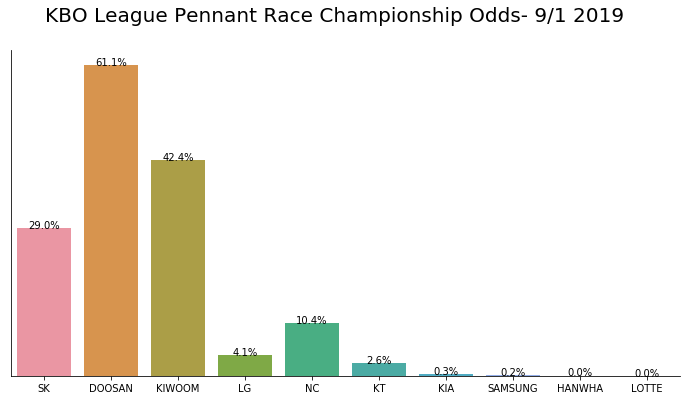

In [94]:
draw_bar_chart(predicts_to_win, 'KBO League Pennant Race Championship Odds- 9/1 2019')

#### 2. KBO League Playoff Odds

In [95]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
X =  df[features]

print(X.head())
# Set target data frames
win_y = df['WIN']
post_y = df['POST']

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    post_y, 
                                                    test_size=.2, 
                                                    random_state=27)

##X_train, X_test, y_train, y_test = train_test_split(X, win_y, stratify = win_y, test_size=80, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

     AVG    OPS   RISP  PH-BA   ERA  WHIP   FPCT
0  0.262  0.714  0.268  0.221  4.55  1.50  0.982
1  0.281  0.805  0.284  0.210  4.62  1.38  0.982
2  0.288  0.813  0.315  0.202  4.82  1.43  0.981
3  0.272  0.774  0.265  0.247  3.94  1.36  0.982
4  0.244  0.690  0.263  0.172  5.43  1.57  0.984
Training set has 65 samples.
Testing set has 17 samples.


In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import itertools

# Set a pipeline with Scaler and Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs',
                                      random_state=27))
])

SVC_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))
])


In [110]:
# Train the model
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=27,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [111]:
# Get score with train data
pipeline.score(X_train, y_train)

0.8461538461538461

In [112]:
# Get score for evaluation
pipeline.score(X_test,y_test)

0.9411764705882353

In [115]:
# Train the model
SVC_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [116]:
# Get score for evaluation
SVC_pipeline.score(X_test,y_test)

0.8235294117647058

In [117]:
# Get score with train data
SVC_pipeline.score(X_train, y_train)

0.8769230769230769

In [118]:
predicts_to_post = {}
for team, value in stat_0901.items():
    proba = pipeline.predict_proba([value])[0][1]*100
    predicts_to_post[team] = proba
    print(f'{team} :  {proba:.4}%')

SK :  95.93%
DOOSAN :  96.51%
KIWOOM :  98.86%
LG :  55.82%
NC :  68.42%
KT :  35.19%
KIA :  5.785%
SAMSUNG :  5.25%
HANWHA :  0.2124%
LOTTE :  0.2112%


In [119]:
predicts_to_post_svc = {}
for team, value in stat_0901.items():
    proba = SVC_pipeline.predict_proba([value])[0][1]*100
    predicts_to_post_svc[team] = proba
    print(f'{team} :  {proba:.4}%')

SK :  83.99%
DOOSAN :  87.13%
KIWOOM :  87.29%
LG :  63.64%
NC :  60.89%
KT :  50.85%
KIA :  7.796%
SAMSUNG :  6.658%
HANWHA :  6.933%
LOTTE :  8.275%


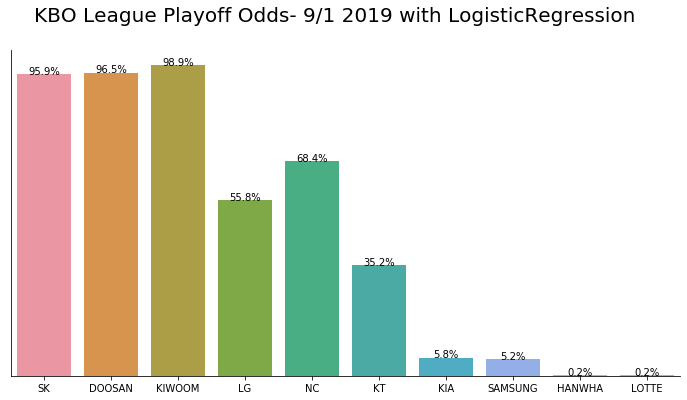

In [123]:
draw_bar_chart(predicts_to_post, 'KBO League Playoff Odds- 9/1 2019 with LogisticRegression')

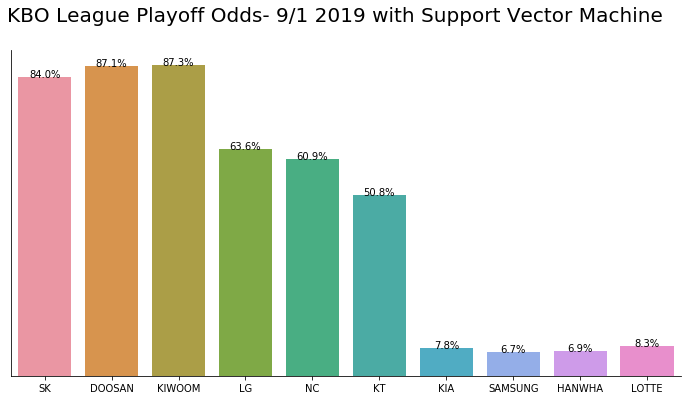

In [122]:
draw_bar_chart(predicts_to_post_svc, 'KBO League Playoff Odds- 9/1 2019 with Support Vector Machine')